In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
ignore = 26665-26481
datos_todos = np.genfromtxt(url, skip_header=2,  skip_footer=ignore ).astype(int)
columna_tercera = datos_todos[:, 2]
columna_cuarta = datos_todos[:, 3]
dias = np.arange(1, 26479+ 1)

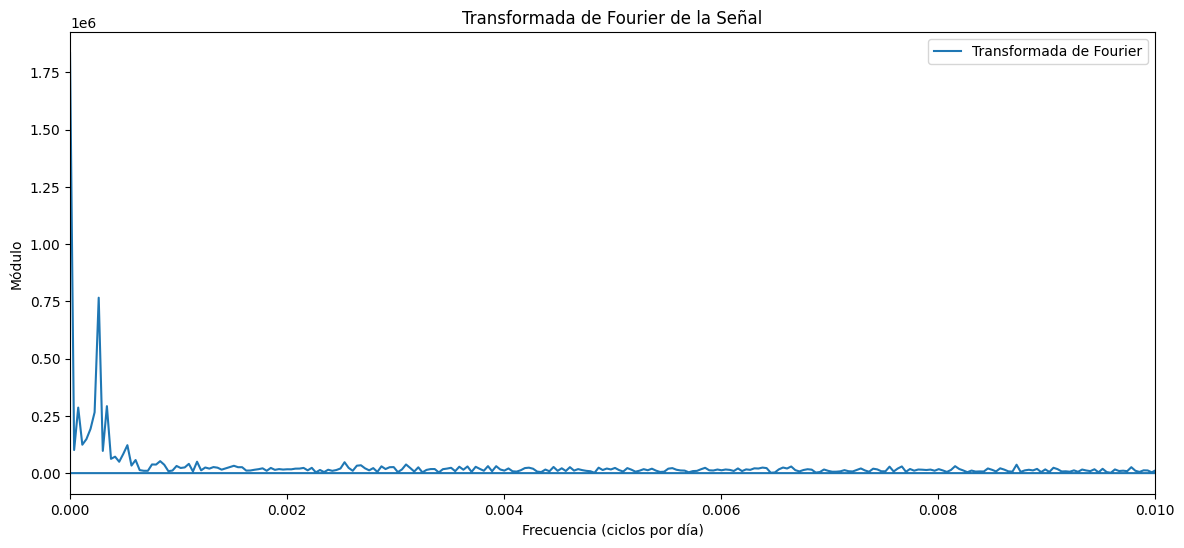

In [3]:
#Punto 1
##1.1
ruido_x = 0.5 * np.random.normal(size=dias.shape)
dias_perturbados = dias + ruido_x
y=columna_cuarta
frecuencia_muestreo=1 #De los datos uno puede ver que es aproximadamente un día.
frecuencias=np.fft.fftfreq(len(y),frecuencia_muestreo)
transformada=np.fft.fft(y)
modulo=np.abs(transformada)
modulo_sin_corrimiento=modulo[1:] #Tocó quitar el primero porque por mucho ruido que le metí no funcionó.
indice_max=np.argmax(modulo_sin_corrimiento)
modulo_max,frecuencia_principal=modulo[indice_max+1],frecuencias[indice_max+1]
plt.figure(figsize=(14, 6))
plt.plot(frecuencias, modulo, label='Transformada de Fourier')
plt.xlabel('Frecuencia (ciclos por día)')
plt.ylabel('Módulo')
plt.title('Transformada de Fourier de la Señal')
plt.xlim(0, 0.01)  # Mostrar frecuencias en el rango de 0 a 10 ciclos por día
plt.legend()
plt.show()

In [ ]:
datos_todos['fecha'] = pd.to_datetime(datos_todos[['año', 'mes', 'dia']])
columnas = ['año', 'mes', 'dia', "SSN"]
datos_todos = np.genfromtxt(url, skip_header=2,  skip_footer=ignore, names=columnas ).astype(int)